In [1]:
import math
import datetime as dt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.optimize as spo

%matplotlib inline

In [2]:
def symbol_to_path(symbol):
    """Return CSV file path given ticker symbol"""
    return os.path.join("{}.csv".format(str(symbol)))

In [3]:
#normalize_data  stock
"""def get_data(symbols,dates):
    """Read stock data(adjusted close) for given symbols from CSV files."""
    df=pd.DataFrame(index=dates)
    if 'SPY' not in symbols: #To add SPY for refernece,if absent
        symbols.insert(0,'SPY')
        
    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol),index_col='Date',
                           parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan']) 
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp)
        if symbol =='SPY': #drop dates SPY  did not trade
            df=df.dropna(subset=["SPY"])
        df=df/df.ix[0,:]
    return df """
   
   

SyntaxError: invalid syntax (<ipython-input-3-9ade0299e4fd>, line 3)

In [22]:
#Normal stock output
def get_data(symbols,dates):
    """Read stock data(adjusted close) for given symbols from CSV files."""
    df=pd.DataFrame(index=dates)
    if 'SPY' not in symbols:        
        #To add SPY for refernece,if absent
        symbols.insert(0,'SPY')
        
    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol),index_col='Date',
                           parse_dates=True,usecols=['Date','Adj Close'],na_values=['nan']) 
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df=df.join(df_temp)
        if symbol =='SPY': #drop dates SPY  did not trade
            df=df.dropna(subset=["SPY"])
    return df


In [6]:
###Plot Daily Return 
# make plot frame
def plot_data(df, title="Stock prices",xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

In [7]:
#Compute daily return
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_returns=df.copy()
    daily_returns=(df/df.shift(1))-1
    daily_returns.ix[0,:]=0
    return daily_returns


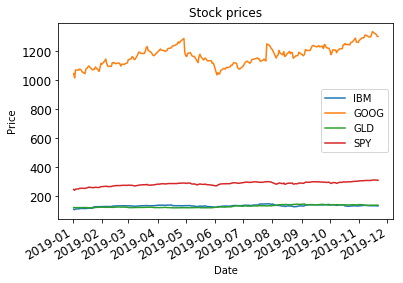

C:\Users\liuyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


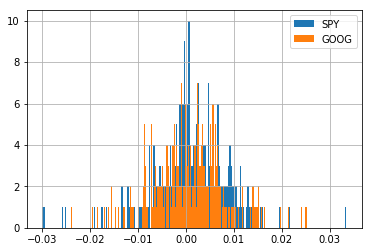

bata_GOOG 1.2877962901206805
alpha_GOOG -0.00025692377383348497


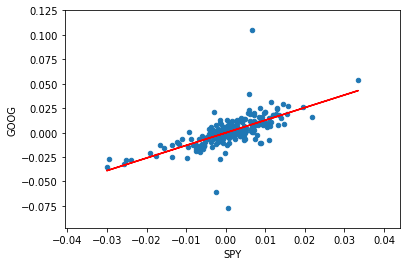

bata_IBM 1.0888167446736867
alpha_IBM -0.00018030136195459185


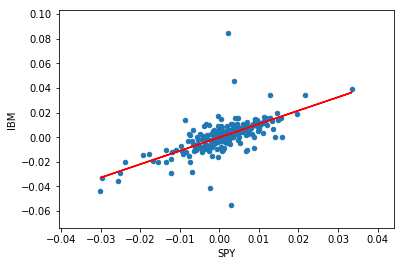

In [8]:
# Plot two stocks daily return in one hist graph
def test_run():
    # Read data
    dates = pd.date_range('2019-01-01', '2019-11-21')  # one month only
    symbols = ['IBM','GOOG','GLD','SPY']
    df = get_data(symbols, dates)
    plot_data(df)

    #compute daliyu returns
    daily_returns = compute_daily_returns(df)
    
    daily_returns['SPY'].hist(bins=200,label='SPY')
    daily_returns['GLD'].hist(bins=200,label='GOOG')
    plt.legend(loc='upper right')
    plt.show()
    
    
    #Scatterplot 
    #daily_returns.plot(kind='scatter',x='SPY',y='GLD')
    #plt.show()
    
    #daily_returns.plot(kind='scatter',x='SPY',y='GOOG')
    #plt.show()
    
    # cal tw two stcoks compare to SPY
    daily_returns.plot(kind='scatter',x='SPY',y='GOOG')
    beta_GOOG,alpha_GOOG = np.polyfit(daily_returns['SPY'],daily_returns['GOOG'],1)
    print("bata_GOOG",beta_GOOG)
    print("alpha_GOOG",alpha_GOOG)
    plt.plot(daily_returns['SPY'],beta_GOOG*daily_returns['SPY']+alpha_GOOG,'-',color='r')
    
    plt.show()
 
    daily_returns.plot(kind='scatter',x='SPY',y='IBM')
    beta_GOOG,alpha_GOOG = np.polyfit(daily_returns['SPY'],daily_returns['IBM'],1)
    print("bata_IBM",beta_GOOG)
    print("alpha_IBM",alpha_GOOG)
    plt.plot(daily_returns['SPY'],beta_GOOG*daily_returns['SPY']+alpha_GOOG,'-',color='r')
    plt.show()

    
if __name__ == "__main__":
    test_run()     

In [9]:
def new():
    # Read data
    dates = pd.date_range('2019-01-01', '2019-11-21')  # one month only
    symbols = ['IBM','GOOG','GLD','SPY']
    df = get_data(symbols, dates)
    print ((df).head())
if __name__ == "__main__":
    new()

                   IBM         GOOG         GLD         SPY
2019-01-02  109.937111  1045.849976  121.330002  246.737808
2019-01-03  107.742371  1016.059998  122.430000  240.849976
2019-01-04  111.950539  1070.709961  121.440002  248.917435
2019-01-07  112.742554  1068.390015  121.860001  250.880051
2019-01-08  114.345657  1076.280029  121.529999  253.237152


In [10]:
###Cal whole portfolio return
def Portfolio_return_indicator():
    # Read data
    dates = pd.date_range('2019-01-01', '2019-11-21')  # one month only
    symbols = ['IBM','GOOG','GLD','SPY']
    df = get_data(symbols, dates)
    
    #Normalize data 
    normed_value=df/df.ix[0,:]
    #print(normed_value)
    
    #Multip by weight
    normed_value['SPY']=normed_value['SPY']*0.4
    normed_value['GOOG']=normed_value['GOOG']*0.1
    normed_value['GLD']=normed_value['GLD']*0.1
    normed_value['IBM']=normed_value['IBM']*0.4
   
    
    #Multip first row value
    pos_vals=normed_value*1000000 # multip by amount of value
    
    
    #port -daily-total value.
    portfolio_return=pos_vals.sum(axis=1)
    
    #Cal daily portfolio return
    daily_returns_port =(portfolio_return/portfolio_return.shift(1))-1
    daily_returns_port=daily_returns_port[1:]
    #print(daily_returns_port)
    
    #Cal cumulative return
    cumulative_return=daily_returns_port[-1]/daily_returns_port[0]-1
    print("Cumulative return:",cumulative_return)
    
    #Cal avg daily return 
    avg_daily_return=daily_returns_port.mean()
    print("mean return:",avg_daily_return)
    
    #Cal std(risk)
    std=daily_returns_port.std()
    print("std:",std)
    
    #Cal sharp ratio
    sharp_ratio=(daily_returns_port-0).mean()/(daily_returns_port-0).std()
    print("sharp_ratio:",sharp_ratio)
    #Cal std daily return
    
    
if __name__ == "__main__":
    Portfolio_return_indicator()

Cumulative return: -1.030505030408033
mean return: 0.0009526599161689213
std: 0.008841638761502247
sharp_ratio: 0.10774698467855734


C:\Users\liuyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


Original line : C0 =4.0,C1=2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 121.27837176847645
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line: C0=4.23593060586245,C1=0.7135098305565205


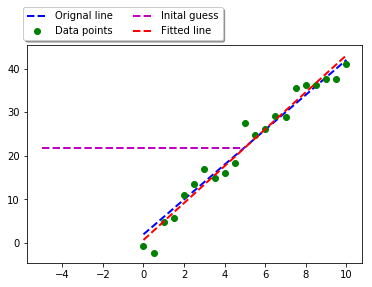

In [11]:
#Create a optimitze and to test the  performance for liner 

def error(line, data):
    """Compute error between given line model and observed data.
    Parameters
    _ _ _ _ _ _ 
    
    line: tuple/list/array(C0,C1) whrer C0 is slope and C1 is Y-intercept data :
    2D array where each row is a point(x,y)
    
    Returns error as a signle real value.
    """
    error=np.sum((data[:,1]-(line[0]*data[:,0]+line[1]))**2)
    return (error)

def fit_line(data,error):
    
    #Generate initial guess for line model
    l=np.float32([0,np.mean(data[:,1])])  # guess slope =0 , intercept = mean(y_values)
    
    #Plot initial guess
    x_ends=np.float32([-5,5])
    plt.plot(x_ends,l[0]*x_ends+l[1],'m--',linewidth=2.0,label="Inital guess")
   
    
    #Call optimizer to miniize error function
    result=spo.minimize(error,l,args=(data,),method='SLSQP',options={'disp':True})
    
    return(result.x)

   
    
def test_run_performance():
    #Define original line
    l_orig=np.float32([4,2])
    print ("Original line : C0 ={},C1={}".format(l_orig[0], l_orig[1]))
    Xorig=np.linspace(0,10,21)
    Yorig=l_orig[0]*Xorig + l_orig[1]
    plt.plot(Xorig,Yorig,'b--',linewidth=2.0,label="Orignal line")
    
    #Generate noisy data points
    noise_sigma=3.0
    noise=np.random.normal(0,noise_sigma,Yorig.shape)
    data=np.asarray([Xorig,Yorig +noise]).T
    plt.plot(data[:,0],data[:,1],'go',label="Data points")
    
    #Try to fit a line to this data
    l_fit=fit_line(data,error)
    print ("Fitted line: C0={},C1={}".format(l_fit[0],l_fit[1]))
    plt.plot(data[:,0],l_fit[0]*data[:,0]+l_fit[1],'r--',linewidth=2.0,label="Fitted line")
    plt.legend(loc="center right",bbox_to_anchor=(0.6, 1.1),ncol=2,shadow=True)
if __name__ == "__main__":

    test_run_performance()  
    

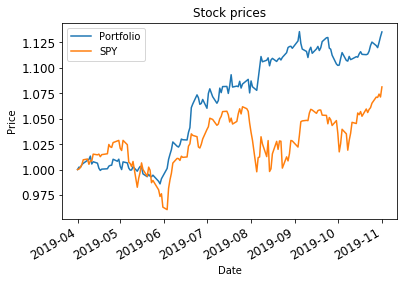

Start Date: 2019-04-01 00:00:00
End Date: 2019-11-01 00:00:00
Symbols: ['GOOG', 'SPY', 'GLD', 'IBM']
Allocations: [0.         0.41137052 0.58862948 0.        ]
Sharpe Ratio: 2.6694567684017882
Volatility (stdev of daily returns): 0.005074742539367513
Average Daily Return: 0.0008533685537612727
Cumulative Return: 0.13527665258501576


In [12]:
#Portfolio optimization from Georgia of technology CS 7646 

def portfolio_value(prices, allocations):
    normed = prices / prices.iloc[0]    
    alloced = normed*allocations
    pos_value = alloced * 1
    return pos_value.sum(axis=1)


def daily_returns(df):
    daily_return = (df / df.shift(1)) - 1
    daily_return.iloc[0] = 0
    return daily_return


def sharpe(daily_returns):
    s = math.sqrt(252)*(daily_returns.mean()/daily_returns.std())
    return s


def minimize(allocations, prices):
    port_val = portfolio_value(prices, allocations)
    daily_return = daily_returns(port_val)
    s = sharpe(daily_return)
    return -s


# This is the function that will be tested by the autograder
# The student must update this code to properly implement the functionality
def optimize_portfolio(sd=dt.datetime(2019,4,1), ed=dt.datetime(2019,11,1),
                       syms=['IBM','SPY','GOOG','GLD'], gen_plot=False):

    # Read in adjusted closing prices for given symbols, date range                                                
    dates = pd.date_range(sd, ed)
    prices_all = get_data(syms, dates) # automatically adds SPY
    prices_all = prices_all / prices_all.iloc[0]
    prices = prices_all[syms] # only portfolio symbols
    prices_spy = prices_all['SPY'] # only SPY, for comparison later

    # find the allocations for the optimal portfolio                                                
    # note that the values here ARE NOT meant to be correct for a test case                                                
    # allocs = np.asarray([0.35, 0.35, 0.10, 0.10, 0.10]) # add code here to find the allocations
    allocs = spo.minimize(minimize, np.random.dirichlet(np.ones(prices.shape[1])), args=(prices,), method="SLSQP",
                          bounds=((0,1),)*prices.shape[1],
                          constraints=(
                              {'type':'eq', 'fun': lambda x: x.sum()-1}
                          ))["x"]

    # Get daily portfolio value
    # port_val = prices_SPY # add code here to compute daily portfolio values
    port_val = portfolio_value(prices, allocs)

    daily_return = daily_returns(port_val)
    # cr, adr, sddr, sr = [0.25, 0.001, 0.0005, 2.1] # add code here to compute stats
    cr = (port_val[-1]/port_val[0])-1
    adr = daily_return.mean()
    sddr = daily_return.std()
    sr = sharpe(daily_return)

    # Compare daily portfolio value with SPY using a normalized plot
    if gen_plot:                                                
        # add code to plot here                                                
        df_temp = pd.concat([port_val, prices_spy], keys=['Portfolio', 'SPY'], axis=1)
        plot_data(df_temp)

    return allocs, cr, adr, sddr, sr


def test_code():
    # This function WILL NOT be called by the auto grader                                                
    # Do not assume that any variables defined here are available to your function/code                                                
    # It is only here to help you set up and test your code                                                

    # Define input parameters                                                
    # Note that ALL of these values will be set to different values by                                                
    # the autograder!                                                

    start_date = dt.datetime(2019, 4, 1)
    end_date = dt.datetime(2019, 11, 1)
    symbols = ['GOOG', 'SPY', 'GLD', 'IBM']

    # Assess the portfolio
    allocations, cr, adr, sddr, sr = optimize_portfolio(sd=start_date, ed=end_date,
                                                        syms=symbols, gen_plot=True)

    # Print statistics                                                
    print("Start Date:", start_date)
    print("End Date:", end_date)
    print("Symbols:", symbols)
    print("Allocations:", allocations)
    print("Sharpe Ratio:", sr)
    print("Volatility (stdev of daily returns):", sddr)
    print("Average Daily Return:", adr)
    print("Cumulative Return:", cr)

if __name__ == "__main__":
    # This code WILL NOT be called by the auto grader
    # Do not assume that it will be called                                                
    test_code() 


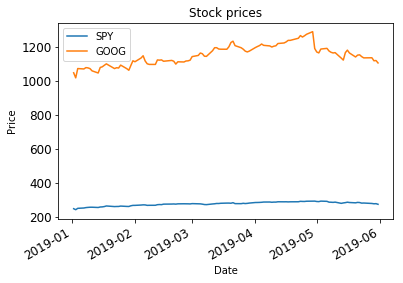

C:\Users\liuyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


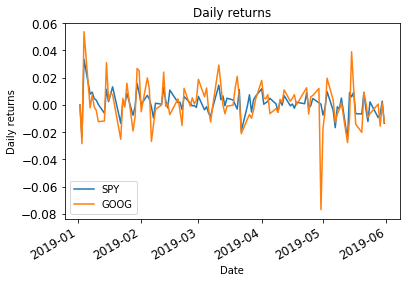

Mean= 0.0009944874255543889
Std= 0.008139396879656747
Kurtosis SPY     3.078792
GOOG    5.853931
dtype: float64


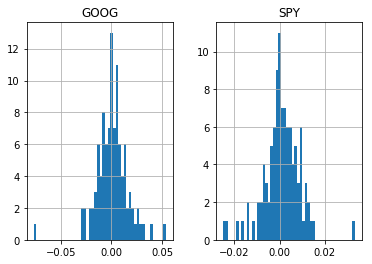

In [13]:
def test_run():
    # Read data
    dates = pd.date_range('2019-01-01', '2019-05-31')  # one month only
    symbols = ['SPY','GOOG']
    df = get_data(symbols, dates)
    plot_data(df)
   
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
   
    #Plot a histogram
    daily_returns.hist(bins=50) # change no. of bins to 20
    
    #Cal mean and standard deviation
    mean=daily_returns['SPY'].mean()
    print ("Mean=",mean)
    
    print("Std=",daily_returns['SPY'].std())
    
    print ("Kurtosis",daily_returns.kurtosis())
    
    #plt.axvline(mean,color='w',linestyle='dashed',linewidth=2)
    #plt.show()
    
if __name__ == "__main__":
    test_run()    

In [14]:
def test_run():
    # Read data
    dates = pd.date_range('2019-01-01', '2019-05-31')  # one month only
    symbols = ['SPY','GOOG']
    df = get_data(symbols, dates)
    plot_data(df)
   
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

In [15]:
# This is for from get_rolling_mean to test_run_rolling
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window).mean()

In [16]:
def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return values.rolling(window).std()


In [17]:
def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band=rm+rstd *2
    lower_band=rm-rstd*2
    return upper_band, lower_band

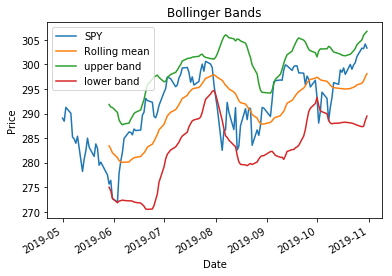

In [18]:
def test_run_rolling():
    #Define a date range
    dates=pd.date_range('2019-05-01','2019-10-31')
    
    symbols=['SPY']
    
    #Get stock data
    df=get_data(symbols, dates)  
    
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()
    
    #Slice by row(dates) using DataFrame.ix[] selector
    #print df.ix['2019-05-01':'2019-05-15'] 
    
    #Slice by column (symbols)
    #print df['GOOG'] # a single label selects a signle column
    #print df['IBM','GLD'] # a list of labels 
if __name__ == "__main__":
    test_run_rolling()

In [189]:
dates=pd.date_range('2019-05-01','2019-10-31')
    
symbols=['SPY']
    
#Get stock data
df=get_data(symbols, dates)  
    
# 1. Compute rolling mean
rm_SPY = get_rolling_mean(df['SPY'], window=20)
rm_SPY=rm_SPY.dropna()
#print(rm_SPY)
# 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['SPY'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
upper_band=upper_band.dropna()
lower_band=lower_band.dropna()
print(type(rm_SPY))
print(type(upper_band))

dataX = list(zip(rm_SPY,lower_band,upper_band))
dataY=df['SPY']
print(dataX)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
[(283.42380225, 275.0056497452579, 291.84195475474206), (282.79081885, 274.2549444863594, 291.32669321364057), (282.0028077, 272.78001704253535, 291.22559835746466), (281.03896799999995, 271.8614020081916, 290.2165339918083), (280.4302537, 272.20760174436134, 288.6529056556386), (280.18409284999996, 272.27635155118605, 288.09183414881386), (280.04887709999997, 272.38644240091304, 287.7113117990869), (280.0979112, 272.3184049848058, 287.8774174151942), (280.14100205, 272.2296970980077, 288.0523070019923), (280.5392183, 272.2435064862933, 288.8349301137067), (280.78637100000003, 272.17785425347967, 289.3948877465204), (281.01024185, 272.00394961618645, 290.01653408381355), (281.08750775, 271.9124710300954, 290.2625444699046), (281.26234445, 271.7933543615225, 290.7313345384775), (281.6808671, 271.49630646772516, 291.86542773227484), (282.00528269999995, 271.1439430295946, 292.8666223704053), (282.5119676, 270.5746679

In [196]:
dataY_1=dataY.iloc[19:]#
print(dataY_1)

2019-05-29    275.650177
2019-05-30    276.403046
2019-05-31    272.678406
2019-06-03    271.985016
2019-06-04    277.888916
2019-06-05    280.296021
2019-06-06    282.118683
2019-06-07    284.941864
2019-06-10    286.249451
2019-06-11    286.180115
2019-06-12    285.674927
2019-06-13    286.853668
2019-06-14    286.536743
2019-06-17    286.645660
2019-06-18    289.647156
2019-06-19    290.300934
2019-06-20    293.074585
2019-06-21    292.648560
2019-06-24    292.290222
2019-06-25    289.423462
2019-06-26    289.134766
2019-06-27    290.160034
2019-06-28    291.653137
2019-07-01    294.300934
2019-07-02    295.067383
2019-07-03    297.426483
2019-07-05    297.088043
2019-07-08    295.455597
2019-07-09    295.823883
2019-07-10    297.237335
                 ...    
2019-09-20    298.279999
2019-09-23    298.209991
2019-09-24    295.869995
2019-09-25    297.619995
2019-09-26    297.000000
2019-09-27    295.399994
2019-09-30    296.769989
2019-10-01    293.239990
2019-10-02    288.059998


In [197]:
import statsmodels.api as sm

X = dataX
y = dataY_1

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.614e+05
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          2.09e-188
Time:                        19:08:10   Log-Likelihood:                -340.76
No. Observations:                 110   AIC:                             685.5
Df Residuals:                     108   BIC:                             690.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3330      0.002    151.346      0.000       0.329       0.337
x2             0.2210      0.114      1.940      0.055      -0.005       0.447
x3             0.4450      0.110      4.057      0.000       0.228       0.662
==============================================================================
Omnibus:                       12.805   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.699
Skew:                          -0.894   Prob(JB):                     0.000643
Kurtosis:                       2.903   Cond. No.                     4.13e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [143]:
#Linear regression
points=()

class LinRegLearner(object):
    def __init__(self,verbose=False):
        pass
    def author(self):

        return 'tb34'        

    def addEvidence(self,dataX,dataY):
        newdataX = np.ones([dataX.shape[0],dataX.shape[1]+1])
        newdataX[:,0:dataX.shape[1]]=dataX  
        self.model_coefs, residuals, rank, s = np.linalg.lstsq(newdataX, dataY)
    def query(self):
        return (self.model_coefs[:-1] * 5).sum(axis = 1) + self.model_coefs[-1]

if __name__=="__main__":
    print ("the secret clue is 'zzyzx'") 

the secret clue is 'zzyzx'


In [134]:
#Linear regression
class LinRegLearner(object):
    def __init__(self,verbose=False):
        pass
    def train(dataX,dataY):
        self.m, self.b= np.linalg.lstsq(dataX,dataY)
    def query(dataX):
        y=self.m*dataX+self.b
        return y
a=LinRegLearner(dataX)
print(a.query())

NameError: name 'self' is not defined

In [131]:
dataX=np.array(dataX)
newdataX = np.ones([dataX.shape[0],dataX.shape[1]+1])
newdataX[:,0:dataX.shape[1]]=dataX
model_coefs, residuals, rank, s = np.linalg.lstsq(newdataX, dataY)
print(dataX)

        #newdataX[:,0:dataX.shape[1]]=dataX  
       # self.model_coefs, residuals, rank, s = np.linalg.lstsq(newdataX, dataY)

C:\Users\liuyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


LinAlgError: SVD did not converge in Linear Least Squares

In [84]:
data_c=list(zip(dataX,dataY))

In [85]:
print(data_c)

[((nan, nan, nan), 289.062714), ((nan, nan, nan), 288.438629), ((nan, nan, nan), 291.26181), ((nan, nan, nan), 290.063202), ((nan, nan, nan), 285.21923799999996), ((nan, nan, nan), 284.822998), ((nan, nan, nan), 283.961182), ((nan, nan, nan), 285.387634), ((nan, nan, nan), 278.21578999999997), ((nan, nan, nan), 280.731873), ((nan, nan, nan), 282.37625099999997), ((nan, nan, nan), 284.991425), ((nan, nan, nan), 283.14892599999996), ((nan, nan, nan), 281.276703), ((nan, nan, nan), 283.81262200000003), ((nan, nan, nan), 282.94088700000003), ((nan, nan, nan), 279.483765), ((nan, nan, nan), 280.11773700000003), ((nan, nan, nan), 277.512482), ((283.42380225, 291.84195475474206, 291.84195475474206), 275.650177), ((282.79081885, 291.32669321364057, 291.32669321364057), 276.403046), ((282.0028077, 291.22559835746466, 291.22559835746466), 272.678406), ((281.03896799999995, 290.2165339918083, 290.2165339918083), 271.98501600000003), ((280.4302537, 288.6529056556386, 288.6529056556386), 277.888916